# scikit-learn{-contrib}
## Adrin Jalali
### adrinjalali on twitter and github
## Anaconda Inc.

# History

The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. See the About us page for a list of core contributors.

It is currently maintained by a team of volunteers.

![](figs/commits.png)

# Recent commits (per month)
![](figs/commits-recent.png)

# The Inria Foundation

![](figs/foundation.png)

# Funding

![](figs/funding.png)

# (Pre new)Governance Model

- Many players in the game
  - contributors
  - core contributors
  - sponsors
- Decision making process
  - sometimes no unanimous consensus
  - loooooong standing PRs and issues
- No BDFL

# Governance Model

![](figs/governance.png)

# sklearn vs sklearn-contrib

![](figs/sklearn.png)

# sklearn vs sklearn-contrib

![](figs/sklearn-contrib.png)

# sklearn-extra

![](figs/sklearn-extra.png)

# sklearn-extra

![](figs/sklearn-extra-doc.png)

# sklearn-pandas
# imbalanced-learn
# metric-learn
# DESlib
# ...

# SLEPs

![](figs/sleps-1.png)

# SLEP 009 - Keyword only args

![](figs/slep-009.png)

# Recent Additions / Changes
## Python 3.5+ (and possibly 3.6+ in the next release)
## There's a nightly build!

- [https://scikit-learn.org/__dev__](https://scikit-learn.org/dev) instead of [https://scikit-learn.org/__stable__](https://scikit-learn.org/stable)
- Improvements to the parallelization backend and serialization (`joblib`, `cloudpickle`)
- `ColumnTransformer`
- Feature Names
- Sample Properties
- Public vs. Private API
- Some new models
  - `HistGradientBoosting`
  - Geleralized Linear Models
- New website design
- New Plotting API
- Imputation
- Permutation Importance
- Partial dependence plots
- Successive Halving

## ColumnTransformer

In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})

column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='passthrough')

column_trans.fit_transform(X)

array([[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 4],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 3, 5],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 5, 3]])

## ColumnTransformer

- Was experimental, not anymore
- Bug fixes, `pandas` support, output feature names, etc

In [6]:
column_trans.get_feature_names()

NotImplementedError: get_feature_names is not yet supported when using a 'passthrough' transformer.

## Feature names (in/out)

![](figs/n-features-in.png)

## Feature names (in/out)

![](figs/n-features-out.png)

## Feature names (in/out)

![](figs/feature-names-out.png)

## Feature names (in/out)

- `pandas`? `xarray`? No
- Some sort of an `sklearn.NamedArray`
- `feature_names_in_`, `feature_names_out_` (instead of `get_feature_names()`)
- and three SLEPs in the making (and another one coming)

## Sample properties
![](figs/sample-props-1.png)

![](figs/sample-props-2.png)

## Resampler
![](figs/resampler-1.png)

![](figs/resampler-2.png)

![](figs/resampler-3.png)

## Public/Private API

- `sklearn.linear_model.LogisticRegression` instead of `sklearn.linear_model.logistic.LogisticRegression`
- `sklearn.ensemble.gradient_boosting.BaseGradientBoosting` -> `sklearn.ensemble._gradient_boosting.BaseGradientBoosting`
- WHY?

![](figs/public-private-1.png)

![](figs/public-private-2.png)

## HistGradientBoosting{Classifier, Regressor}

![](figs/hgbt.png)

## HistGradientBoosting{Classifier, Regressor}

![](figs/hgbt-sw.png)

## HistGradientBoosting{Classifier, Regressor}

- missing values (done)
- more loss functions (some done, some coming)
- sample weights (on the stove, boiling)
- categorical features (next for me)
- ... (lightgbm is our main reference)

# Generalized Linear Models

![](figs/glm.png)

A GLM loss different from the classical squared loss might be appropriate in the following cases:

- If the target values are counts (non-negative integer valued) or frequencies (non-negative), you might use a Poisson deviance with log-link.

- If the target values are positive valued and skewed, you might try a Gamma deviance with log-link.

- If the target values seem to be heavier tailed than a Gamma distribution, you might try an Inverse Gaussian deviance (or even higher variance powers of the Tweedie family).



# The website
![](figs/sklearn-old.png)

![](figs/sklearn-new.png)

## and we're working on the documentation, geting started, etc.

## Plots - ROC Curve
### The new world of plotting - and maintaining them

In [7]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

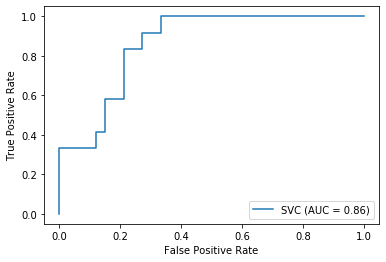

In [8]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

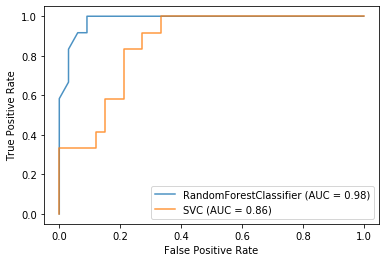

In [9]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

That's where we started to agree on the API, more coming...

## Imputation - missing values


In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


## Iterative imputer

In [11]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


## KNN Imputer

In [12]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## Missing Indicator

In [13]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
mask = np.random.randint(0, 2, size=X.shape).astype(np.bool)
X[mask] = np.nan
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100,
                                               random_state=0)

In [14]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])
transformer = transformer.fit(X_train, y_train)
results = transformer.transform(X_test)
results.shape

(100, 8)

In [15]:
clf = make_pipeline(transformer, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
results = clf.predict(X_test)
results.shape

(100,)

## Permutation Importance (vs rf.feature_importances_)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [17]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
rng = np.random.RandomState(41)
X['random_cat'] = rng.randint(3, size=X.shape[0])
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['pclass', 'sex', 'embarked', 'random_cat']
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'random_num']

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

In [18]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.814


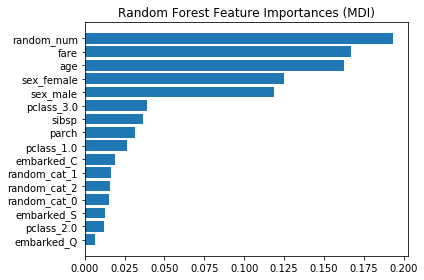

In [19]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

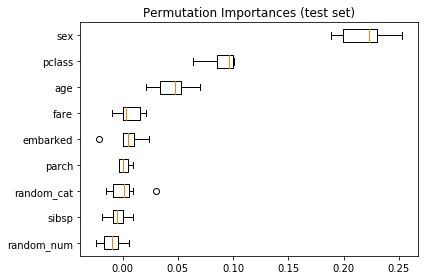

In [20]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

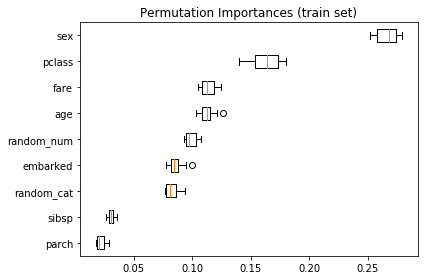

In [21]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Partial Dependence Plots

![](figs/sphx_glr_plot_partial_dependence_002.png)

## Partial Dependence Plots

![](figs/sphx_glr_plot_partial_dependence_003.png)

# Successive Halving

![](figs/sh.png)

# Write your own model!

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500)

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

class MyAwesomeClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self, lr_C=1.0, hgbr_max_iter=20):
        self.lr_C = lr_C
        self.hgbr_max_iter = hgbr_max_iter
    
    def fit(self, X, y, **kwargs):
        self.lr_ = LogisticRegression(C=self.lr_C).fit(X, y, **kwargs)
        self.hgbr_ = HistGradientBoostingClassifier(
            max_iter=self.hgbr_max_iter).fit(X, y, **kwargs)
    
    def predict(self, X):
        return (self.lr_.predict(X) + self.hgbr_.predict(X)) / 2 > 0

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('pca', PCA()),
                     ('myclf', MyAwesomeClassifier())])

param_grid = {'pca__n_components': [2, 5],
              'myclf__lr_C': [.1, 1, 100],
              'myclf__hgbr_max_iter': [10, 50]}

model = GridSearchCV(pipeline, param_grid=param_grid).fit(X, y)
print("Model's best params:", model.best_params_)
print("Model's best score:", model.best_score_)

Model's best params: {'myclf__hgbr_max_iter': 10, 'myclf__lr_C': 0.1, 'pca__n_components': 5}
Model's best score: 0.924


# Thanks

## {more} questions?!